In [32]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [34]:
# Load the data
data_train = pd.read_csv('../data/ml/hotel_reservations_train.csv')
data_test = pd.read_csv('../data/ml/hotel_reservations_test.csv')

X_train = data_train.drop('booking_status', axis=1)
y_train = data_train['booking_status']

X_test = data_test.drop('booking_status', axis=1)
y_test = data_test['booking_status']

In [35]:
# Create a Random Forest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,                   # Number of trees in the forest
    criterion='gini',                   # Function to measure the quality of a split
    max_depth=None,                     # Maximum depth of the tree
    min_samples_split=2,                # Minimum number of samples required to split an internal node
    min_samples_leaf=1,                 # Minimum number of samples required to be at a leaf node
    min_weight_fraction_leaf=0.0,       # Minimum weighted fraction of the sum total of weights
    max_features='sqrt',                # Number of features to consider when looking for the best split
    max_leaf_nodes=None,                # Grow trees with max_leaf_nodes in best-first fashion
    min_impurity_decrease=0.0,          # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
    bootstrap=True,                     # Whether bootstrap samples are used when building trees
    oob_score=False,                    # Whether to use out-of-bag samples to estimate the generalization accuracy
    n_jobs=None,                        # The number of jobs to run in parallel
    random_state=42,                    # Seed of the pseudo random number generator
    verbose=1,                          # Controls the verbosity when fitting and predicting
    warm_start=False,                   # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble
    class_weight=None,                  # Weights associated with classes in the form {class_label: weight}
    ccp_alpha=0.0,                      # Complexity parameter used for Minimal Cost-Complexity Pruning
    max_samples=None                    # If bootstrap is True, the number of samples to draw from X to train each base estimator
)

In [7]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42, verbose=1)

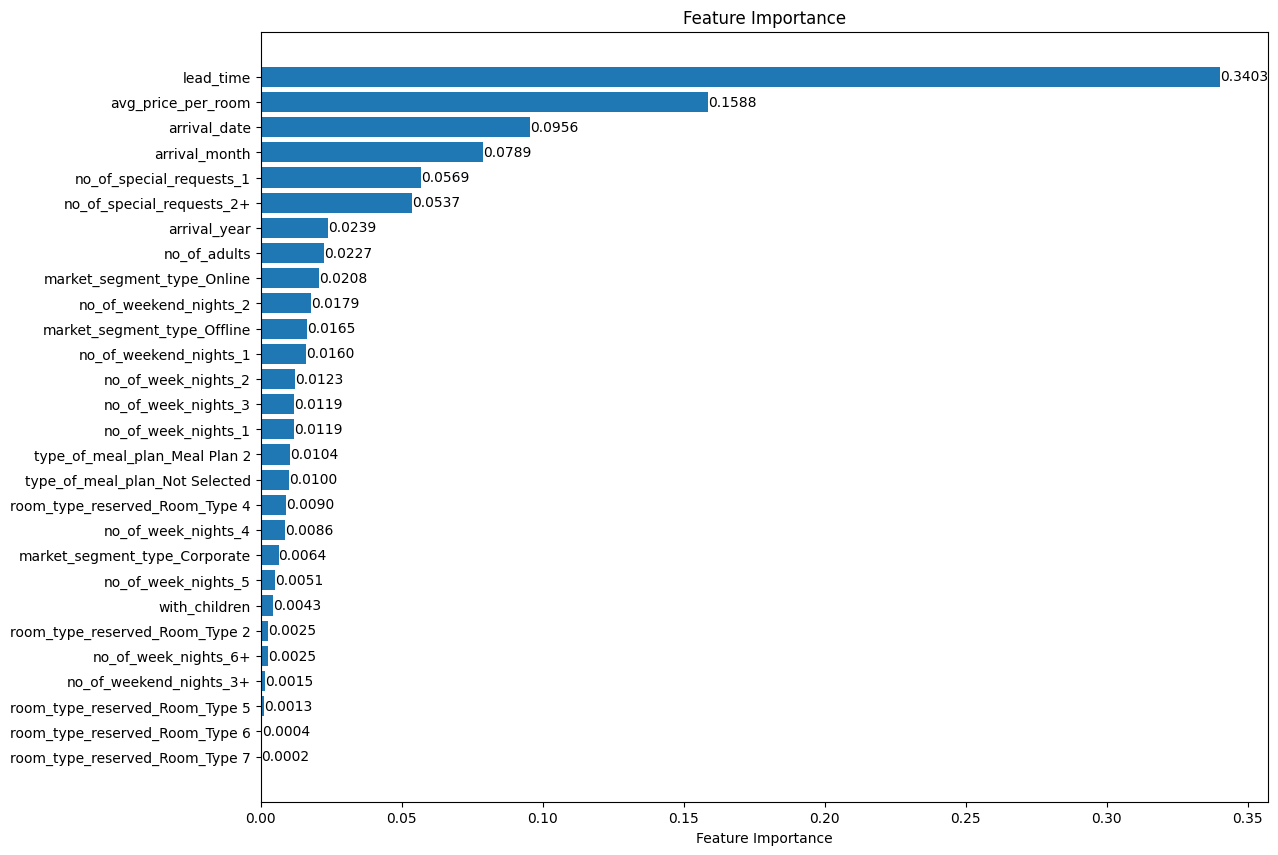

In [8]:
# Sort model.feature_importance and print with feature names
feature_importance = model.feature_importances_
feature_names = X_train.columns
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(13, 10))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')

# Print the value of each importance
for i, v in enumerate(feature_importance[sorted_idx]):
    plt.text(v, i, f"{v:.4f}", va='center')

plt.show()

## Forward Stepwise Selection

In [36]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

In [37]:
from sklearn.model_selection import cross_val_score

def forward_selection(predictors):
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    results = []

    for p in remaining_predictors:
        score = cross_val_score(model, X_train[predictors + [p]], y_train, cv=5, scoring='accuracy').mean()
        results.append((p, score))
        
    results.sort(key=lambda x: x[1], reverse=True)
    return results[0]

In [38]:
predictors = []
selected_features_fwd = []
scores = []

# For each number of features 
for i in range(len(X_train.columns)):
    best_predictor, best_score = forward_selection(predictors)
    predictors.append(best_predictor)
    selected_features_fwd.append(best_predictor)
    scores.append(best_score)
    print(f"Selected {best_predictor} with cross-validated accuracy: {best_score:.4f}")

# Display the selected features and their scores
selected_df = pd.DataFrame({'Feature': selected_features_fwd, 'Accuracy': scores})
print(selected_df)

Selected lead_time with cross-validated accuracy: 0.7633
Selected avg_price_per_room with cross-validated accuracy: 0.8014
Selected arrival_date with cross-validated accuracy: 0.8234
Selected arrival_month with cross-validated accuracy: 0.8332
Selected no_of_special_requests_1 with cross-validated accuracy: 0.8505
Selected no_of_special_requests_2+ with cross-validated accuracy: 0.8739
Selected market_segment_type_Online with cross-validated accuracy: 0.8853
Selected no_of_weekend_nights_1 with cross-validated accuracy: 0.8876
Selected no_of_weekend_nights_2 with cross-validated accuracy: 0.8889
Selected type_of_meal_plan_Not Selected with cross-validated accuracy: 0.8904
Selected room_type_reserved_Room_Type 5 with cross-validated accuracy: 0.8910
Selected no_of_week_nights_3 with cross-validated accuracy: 0.8916
Selected arrival_year with cross-validated accuracy: 0.8923
Selected type_of_meal_plan_Meal Plan 2 with cross-validated accuracy: 0.8930
Selected no_of_adults with cross-vali

## Backward Stepwise Selection

In [12]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

In [18]:
# Define the backward selection function
def backward_selection(predictors):
    results = []
    
    for p in predictors:
        remaining_predictors = [x for x in predictors if x != p]
        score = cross_val_score(model, X_train[remaining_predictors], y_train, cv=5, scoring='accuracy').mean()
        results.append((p, score))
    
    # Sort the results by score in descending order and return the worst one
    results.sort(key=lambda x: x[1], reverse=True)
    return results[0]

In [19]:
# Initialize variables
predictors = list(X_train.columns)
selected_features = []
scores = []

# For each number of features
while len(predictors) > 1:
    worst_predictor, best_score = backward_selection(predictors)
    predictors.remove(worst_predictor)
    selected_features.append(worst_predictor)
    scores.append(best_score)
    print(f"Removed {worst_predictor} with cross-validated accuracy: {best_score:.4f}")

# Display the removed features and their scores
selected_df = pd.DataFrame({'Feature': selected_features, 'Accuracy': scores})
print(selected_df)

Removed no_of_week_nights_6+ with cross-validated accuracy: 0.8933
Removed with_children with cross-validated accuracy: 0.8928
Removed no_of_week_nights_1 with cross-validated accuracy: 0.8935
Removed no_of_week_nights_4 with cross-validated accuracy: 0.8927
Removed room_type_reserved_Room_Type 4 with cross-validated accuracy: 0.8937
Removed no_of_adults with cross-validated accuracy: 0.8929
Removed room_type_reserved_Room_Type 2 with cross-validated accuracy: 0.8929
Removed room_type_reserved_Room_Type 7 with cross-validated accuracy: 0.8929
Removed room_type_reserved_Room_Type 6 with cross-validated accuracy: 0.8931
Removed type_of_meal_plan_Meal Plan 2 with cross-validated accuracy: 0.8926
Removed type_of_meal_plan_Not Selected with cross-validated accuracy: 0.8927
Removed market_segment_type_Corporate with cross-validated accuracy: 0.8931
Removed room_type_reserved_Room_Type 5 with cross-validated accuracy: 0.8930
Removed no_of_weekend_nights_3+ with cross-validated accuracy: 0.892

## Creating best model

In [42]:
# Create best model with features gotten from forward selection taking the top 17 features
model = RandomForestClassifier(
    n_estimators=100,                   # Number of trees in the forest
    criterion='gini',                   # Function to measure the quality of a split
    max_depth=None,                     # Maximum depth of the tree
    min_samples_split=2,                # Minimum number of samples required to split an internal node
    min_samples_leaf=1,                 # Minimum number of samples required to be at a leaf node
    min_weight_fraction_leaf=0.0,       # Minimum weighted fraction of the sum total of weights
    max_features='sqrt',                # Number of features to consider when looking for the best split
    max_leaf_nodes=None,                # Grow trees with max_leaf_nodes in best-first fashion
    min_impurity_decrease=0.0,          # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
    bootstrap=True,                     # Whether bootstrap samples are used when building trees
    oob_score=False,                    # Whether to use out-of-bag samples to estimate the generalization accuracy
    n_jobs=None,                        # The number of jobs to run in parallel
    random_state=42,                    # Seed of the pseudo random number generator
    verbose=1,                          # Controls the verbosity when fitting and predicting
    warm_start=False,                   # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble
    class_weight=None,                  # Weights associated with classes in the form {class_label: weight}
    ccp_alpha=0.0,                      # Complexity parameter used for Minimal Cost-Complexity Pruning
    max_samples=None                    # If bootstrap is True, the number of samples to draw from X to train each base estimator
)

# Fit the model
model.fit(X_train[selected_features_fwd[:17]], y_train)

# Predict the test set
y_pred = model.predict(X_test[selected_features_fwd[:17]])

In [43]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import balanced_accuracy_score

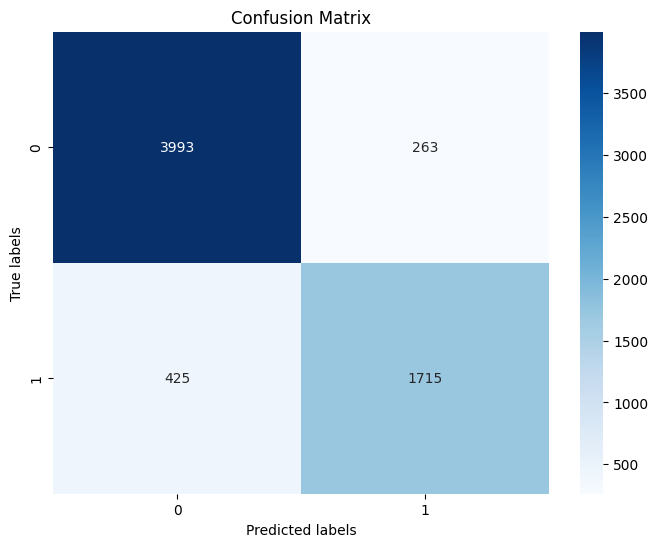

In [44]:
confusion_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [45]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4256
           1       0.87      0.80      0.83      2140

    accuracy                           0.89      6396
   macro avg       0.89      0.87      0.88      6396
weighted avg       0.89      0.89      0.89      6396



In [46]:
# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Compute the precision score
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')

# Compute the recall score
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.2f}')

# Compute the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

# Compute the balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred, average='weighted', multi_class='ovr')
print(f'ROC AUC: {roc_auc:.2f}')

# Compute the ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = roc_auc_score(y_test, y_pred)

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
Balanced Accuracy: 0.87
ROC AUC: 0.87


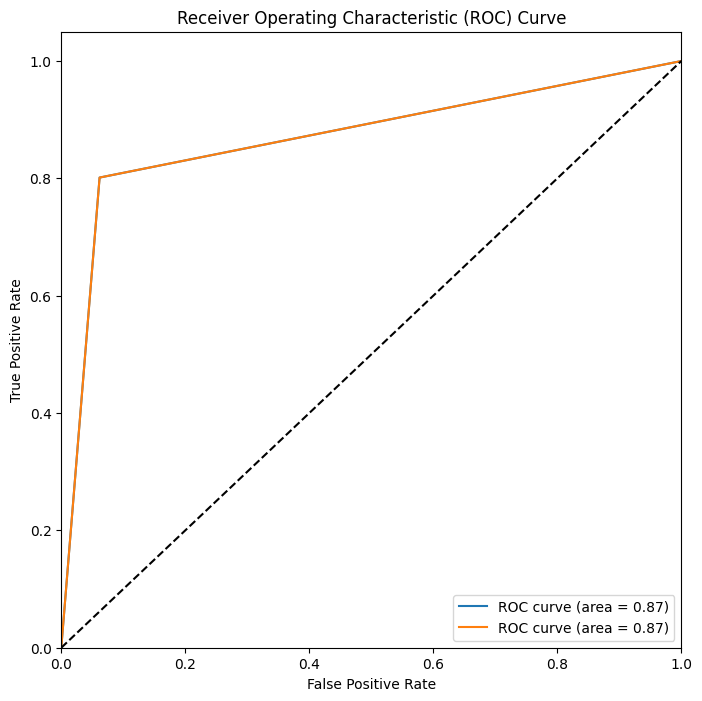

In [47]:
# Plot the ROC curve
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.savefig('../reports/images/roc_curve_best_model.png')
plt.show()

In [48]:
# Save the model
import joblib

joblib.dump(model, '../models/best_model.pkl')

['../models/best_model.pkl']

In [49]:
# Perform cross-validation with the Random Forest model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean():.2f}')

Cross-validation scores: [0.8878249  0.88721658 0.89034402 0.8977717  0.89386239]
Mean cross-validation score: 0.89


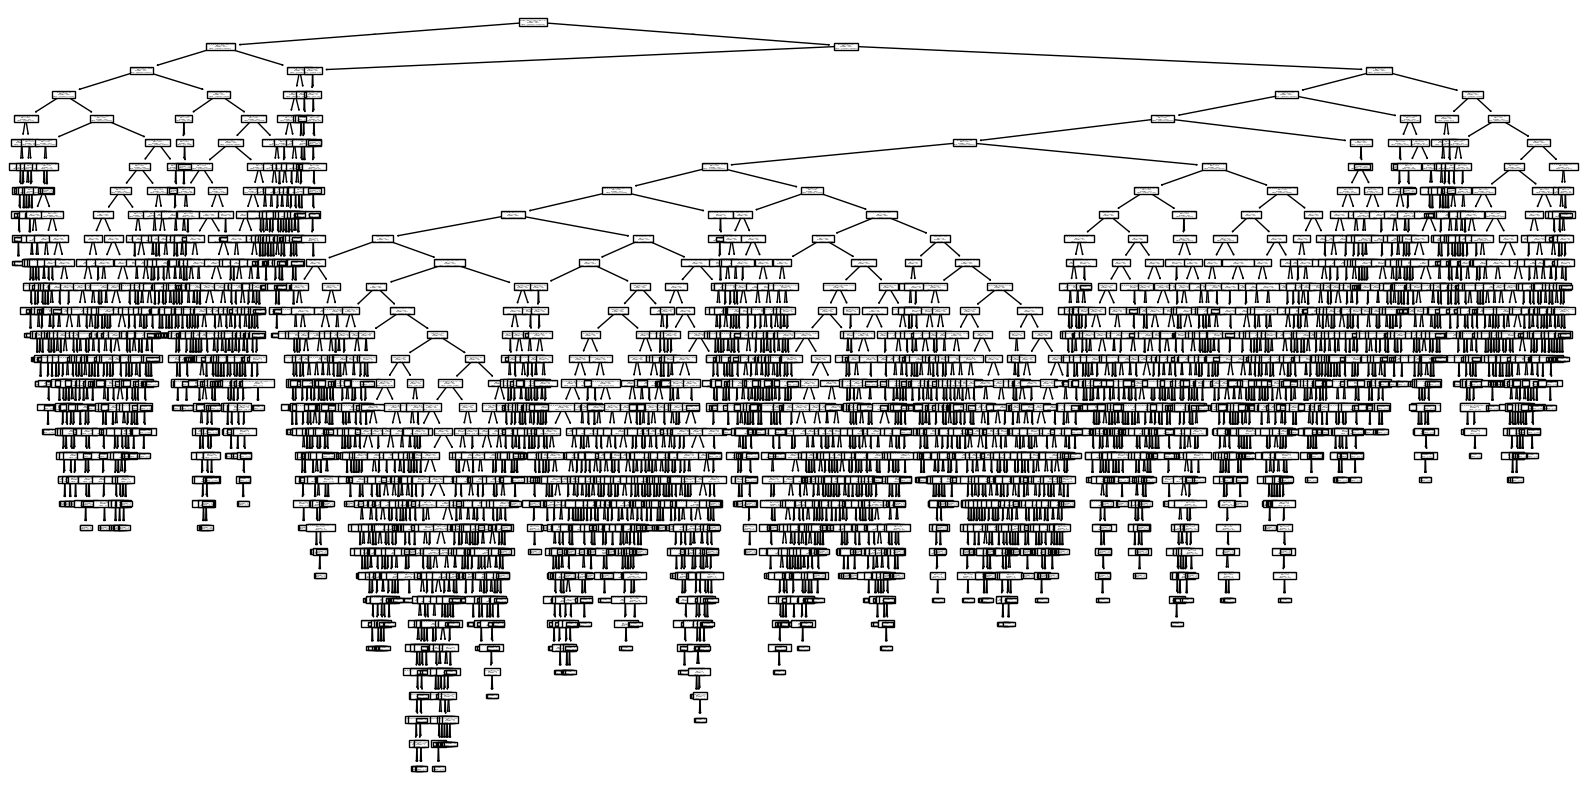

In [55]:
# Visualize trees in the Random Forest model
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=predictors[:17])
plt.savefig('../reports/images/best_model_tree.png')
plt.show()